<a href="https://colab.research.google.com/github/yazhinil/FMML20230017/blob/main/Module%2008%20Lab%2002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pg

import tensorflow as tf
import tensorflow_probability as tfp

In [2]:
!wget https://raw.githubusercontent.com/Foundations-in-Modern-Machine-Learning/course-contents/main/Bayesian/data/symptoms-train.csv
!wget https://raw.githubusercontent.com/Foundations-in-Modern-Machine-Learning/course-contents/main/Bayesian/data/symptoms-test.csv
plt.style.use('ggplot')

--2024-03-25 13:35:34--  https://raw.githubusercontent.com/Foundations-in-Modern-Machine-Learning/course-contents/main/Bayesian/data/symptoms-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1370414 (1.3M) [text/plain]
Saving to: ‘symptoms-train.csv’

symptoms-train.csv  100%[===================>]   1.31M  --.-KB/s    in 0.05s   

2024-03-25 13:35:35 (28.7 MB/s) - ‘symptoms-train.csv’ saved [1370414/1370414]

--2024-03-25 13:35:35--  https://raw.githubusercontent.com/Foundations-in-Modern-Machine-Learning/course-contents/main/Bayesian/data/symptoms-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.1

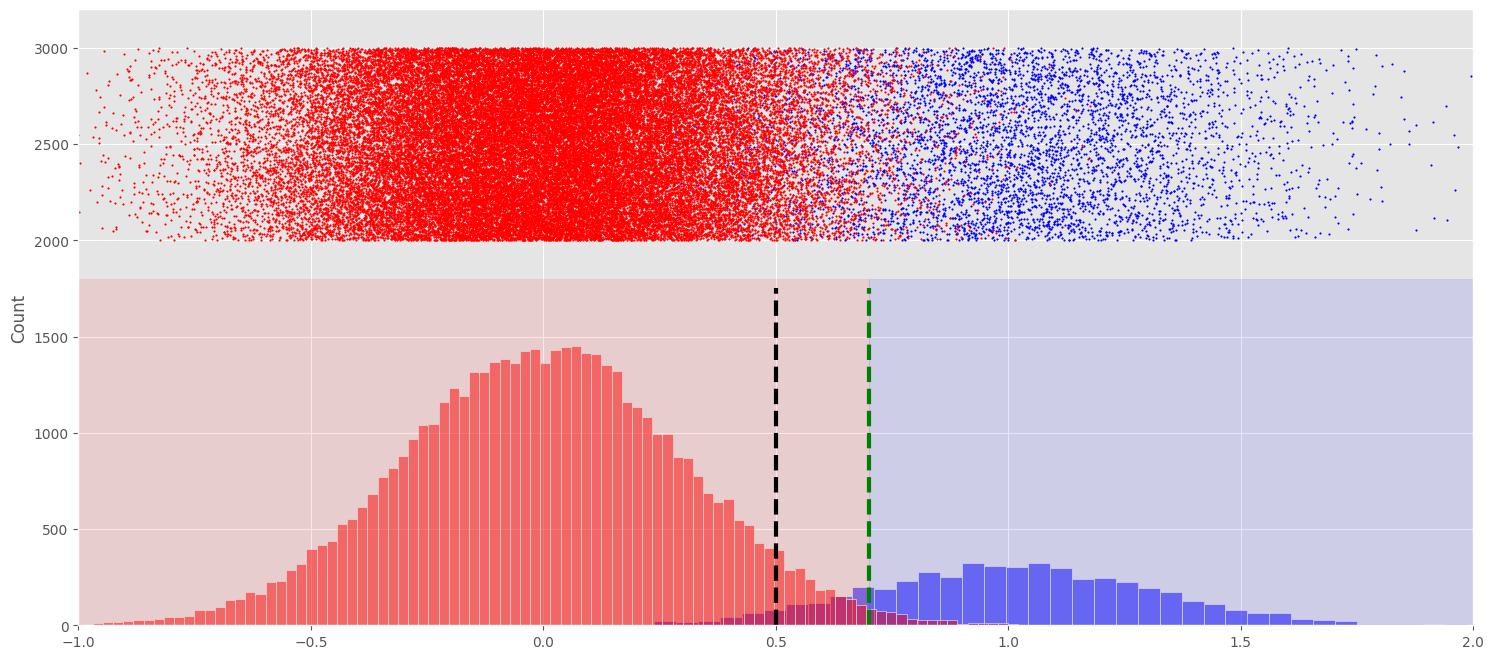

In [3]:
fig, ax = plt.subplots(figsize=(18, 8))
x1 = np.random.normal(1.0, 0.3, size=5000)
x2 = np.random.normal(0.0, 0.3, size=50000)
x = np.concatenate([x1, x2])
sns.histplot(x1, color='blue', alpha=0.5, ax=ax)
sns.histplot(x2, color='red', alpha=0.5, ax=ax)
ax.fill_between(np.linspace(-1.0, 0.7, 100), 0, 1800,  color='r', alpha=0.1)
ax.fill_between(np.linspace(0.7, 2.0, 100), 0, 1800,  color='b', alpha=0.1)
ax.vlines(0.5, 0, 1750, color="k", linestyles="--", lw=3)
ax.vlines(0.7, 0, 1750, color="g", linestyles="--", lw=3)
ax.scatter(x1, [np.random.randint(2000, 3000) for _ in x1], color='b', s=1)
ax.scatter(x2, [np.random.randint(2000, 3000) for _ in x2], color='r', s=1)
ax.set_xlim(-1.0, 2.0)
ax.set_ylim(0, 3200)
plt.show()

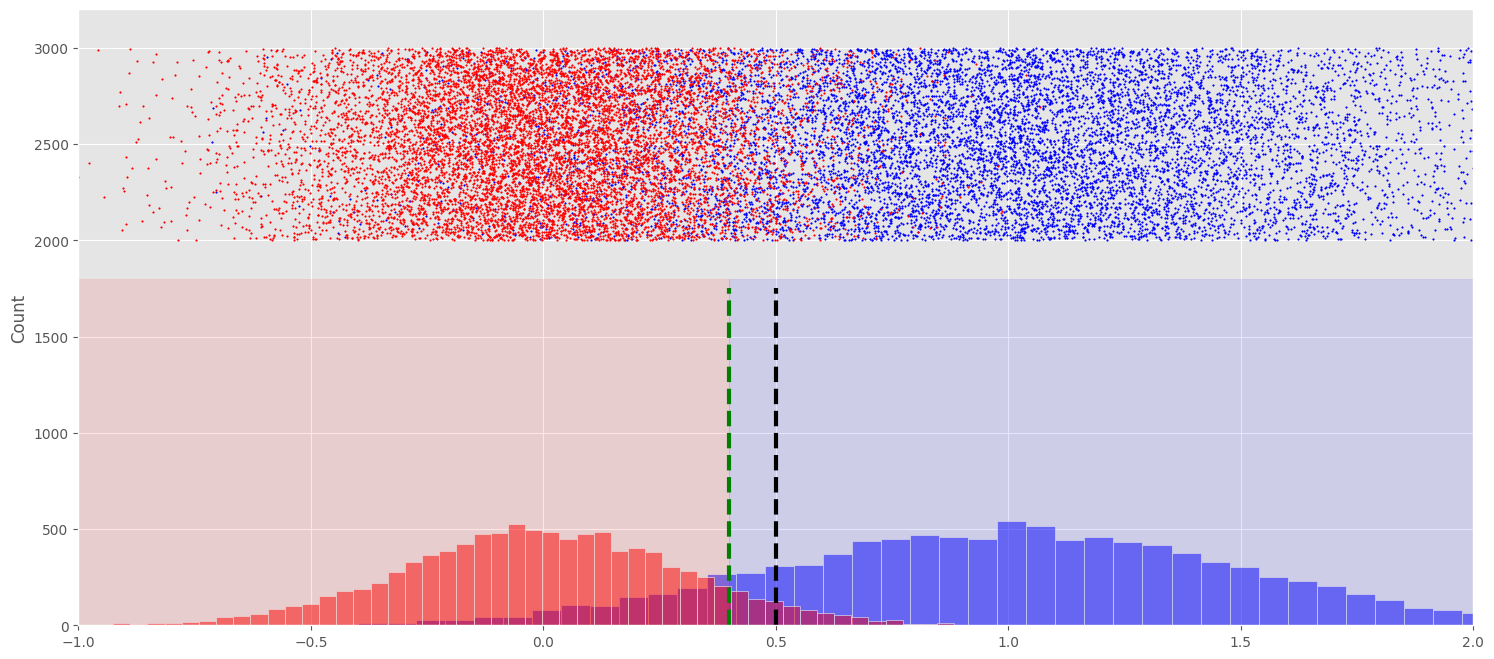

In [4]:
fig, ax = plt.subplots(figsize=(18, 8))
x1 = np.random.normal(1.0, 0.5, size=10000)
x2 = np.random.normal(0.0, 0.3, size=10000)
x = np.concatenate([x1, x2])
sns.histplot(x1, color='blue', alpha=0.5, ax=ax)
sns.histplot(x2, color='red', alpha=0.5, ax=ax)
ax.fill_between(np.linspace(-1.0, 0.4, 100), 0, 1800,  color='r', alpha=0.1)
ax.fill_between(np.linspace(0.4, 2.0, 100), 0, 1800,  color='b', alpha=0.1)
ax.vlines(0.5, 0, 1750, color="k", linestyles="--", lw=3)
ax.vlines(0.4, 0, 1750, color="g", linestyles="--", lw=3)
ax.scatter(x1, [np.random.randint(2000, 3000) for _ in x1], color='b', s=1)
ax.scatter(x2, [np.random.randint(2000, 3000) for _ in x2], color='r', s=1)
ax.set_xlim(-1.0, 2.0)
ax.set_ylim(0, 3200)
plt.show()

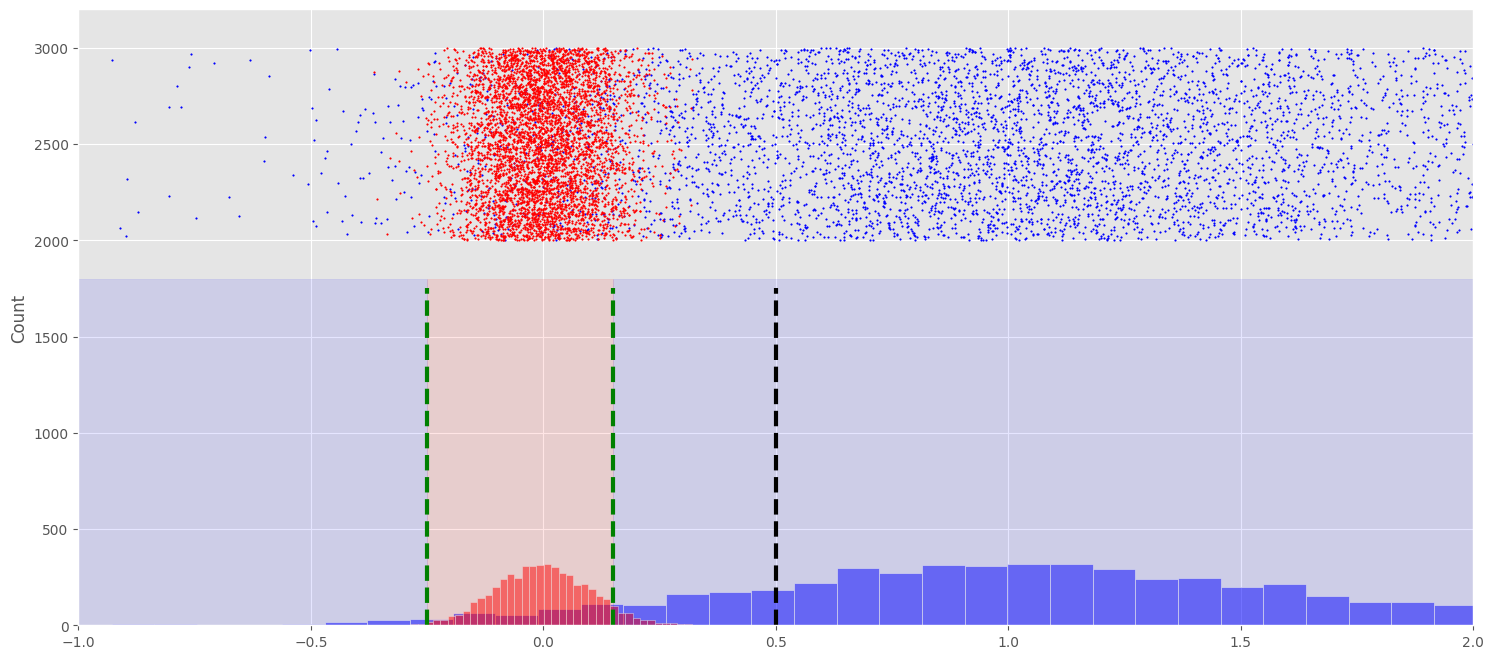

In [5]:
fig, ax = plt.subplots(figsize=(18, 8))
x1 = np.random.normal(1.0, 0.6, size=5000)
x2 = np.random.normal(0.0, 0.1, size=5000)
x = np.concatenate([x1, x2])
sns.histplot(x1, color='blue', alpha=0.5, ax=ax)
sns.histplot(x2, color='red', alpha=0.5, ax=ax)
ax.fill_between(np.linspace(-1.0, -0.25, 100), 0, 1800,  color='b', alpha=0.1)
ax.fill_between(np.linspace(-0.25, 0.15, 100), 0, 1800,  color='r', alpha=0.1)
ax.fill_between(np.linspace(0.15, 2.0, 100), 0, 1800,  color='b', alpha=0.1)
ax.vlines(0.5, 0, 1750, color="k", linestyles="--", lw=3)
ax.vlines(0.15, 0, 1750, color="g", linestyles="--", lw=3)
ax.vlines(-0.25, 0, 1750, color="g", linestyles="--", lw=3)
ax.scatter(x1, [np.random.randint(2000, 3000) for _ in x1], color='b', s=1)
ax.scatter(x2, [np.random.randint(2000, 3000) for _ in x2], color='r', s=1)
ax.set_xlim(-1.0, 2.0)
ax.set_ylim(0, 3200)
plt.show()

In [6]:
patients_df = pd.read_csv("symptoms-train.csv")
patients_df[np.concatenate([np.random.choice(list(patients_df.columns), 6, replace=False), ["prognosis"]])].sample(10)

,silver_like_dusting,dark_urine,swelling_joints,hip_joint_pain,enlarged_thyroid,sweating,prognosis
1400,0,0,0,0,0,0,Dengue
2451,0,0,0,0,0,0,Impetigo
3049,0,0,0,0,0,1,Malaria
3512,0,0,0,0,0,1,Pneumonia
1023,0,1,0,0,0,0,Hepatitis B
4149,0,0,0,0,0,0,Gastroenteritis
4216,0,0,1,1,0,0,Osteoarthristis
1999,0,0,1,0,0,0,Arthritis
4409,0,1,0,0,0,0,Hepatitis D
1020,0,1,0,0,0,0,Hepatitis B


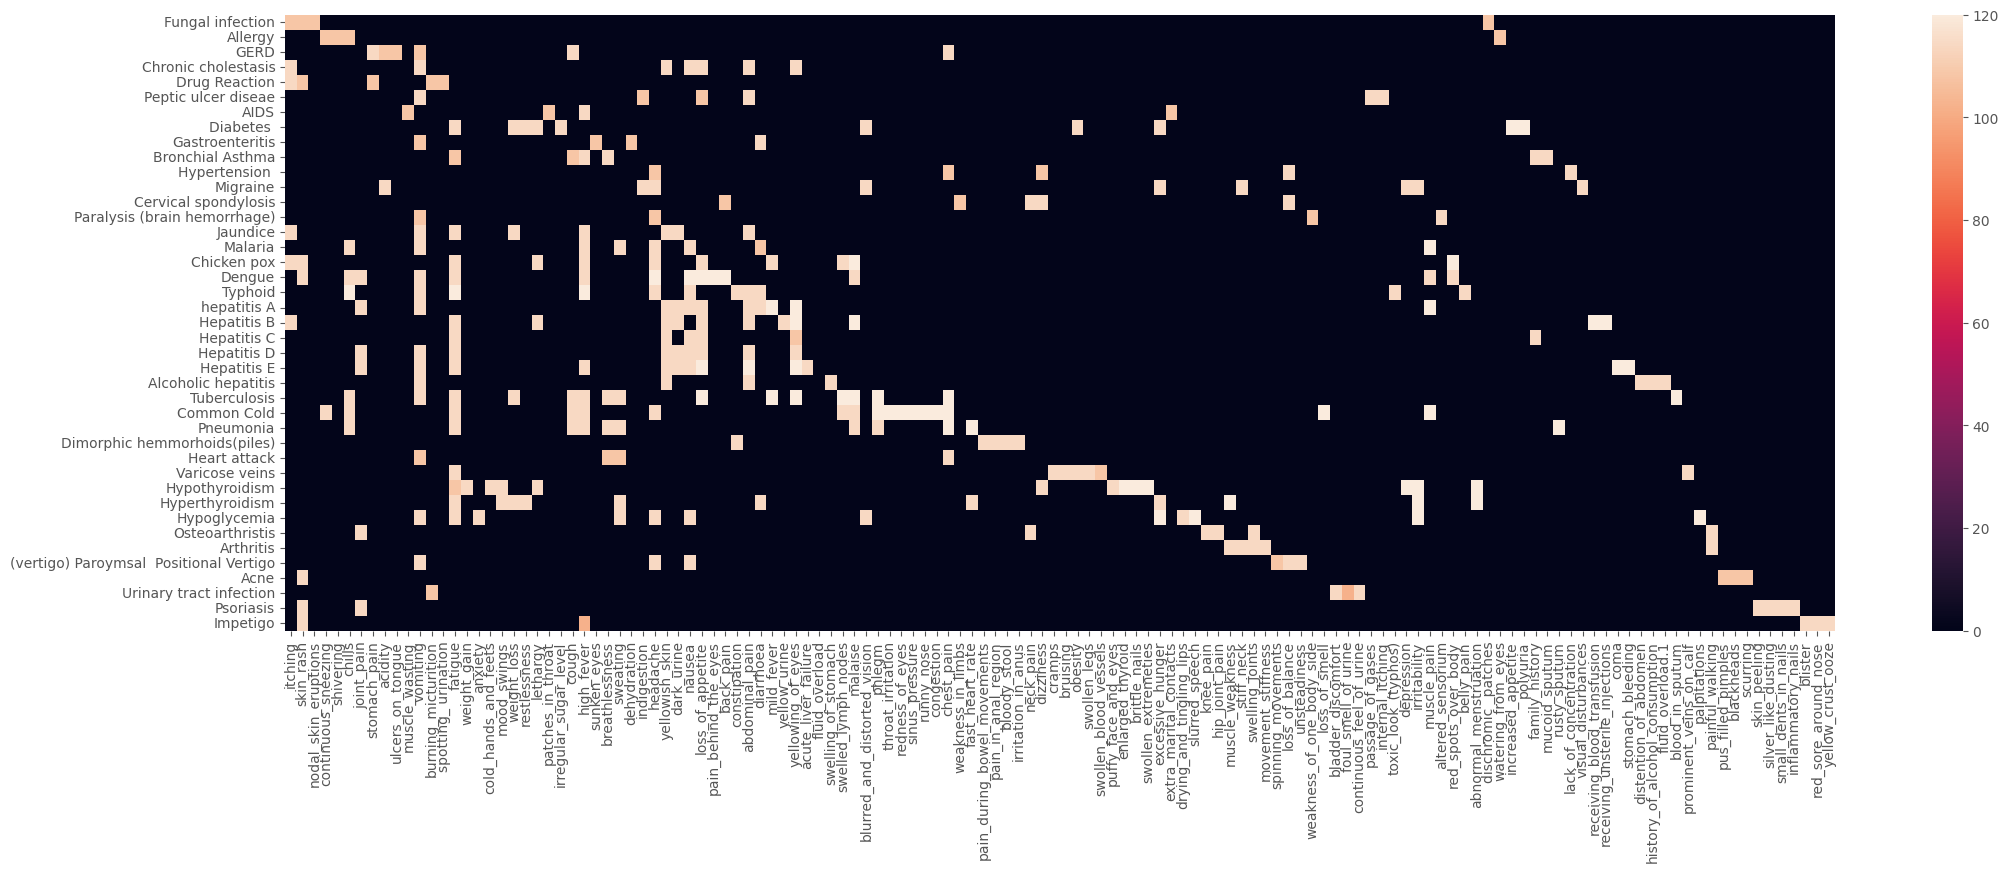

In [7]:
diseases = patients_df["prognosis"].unique()
symptoms = patients_df.drop(["prognosis"], axis=1).columns.values
counts = np.zeros((len(diseases), len(symptoms)))
disease_counts = dict()
for disease_id, disease in enumerate(diseases):
    sub_df = patients_df.loc[patients_df["prognosis"] == disease]
    for symptom_id, symptom in enumerate(symptoms):
        counts[disease_id][symptom_id] = np.sum(sub_df[symptom] == 1)
    disease_counts[disease] = np.sum(counts[disease_id])
plt.figure(figsize=(25, 8))
sns.heatmap(counts, xticklabels=symptoms, yticklabels=diseases)
plt.show()

In [8]:
fig = pg.Figure([pg.Bar(x=diseases, y=np.sum(counts, axis=1))])
fig.update_layout(title_text='Diseases Probaility Histogram (Prior)', xaxis={'title': 'Disease'}, yaxis={'title': 'Count'})
fig.show()
fig = pg.Figure([pg.Bar(x=symptoms, y=np.sum(counts, axis=0))])
fig.update_layout(title_text='Symptoms Probaility Histogram (Likelihood)', xaxis={'title': 'Symptom'}, yaxis={'title': 'Count'})
fig.show()

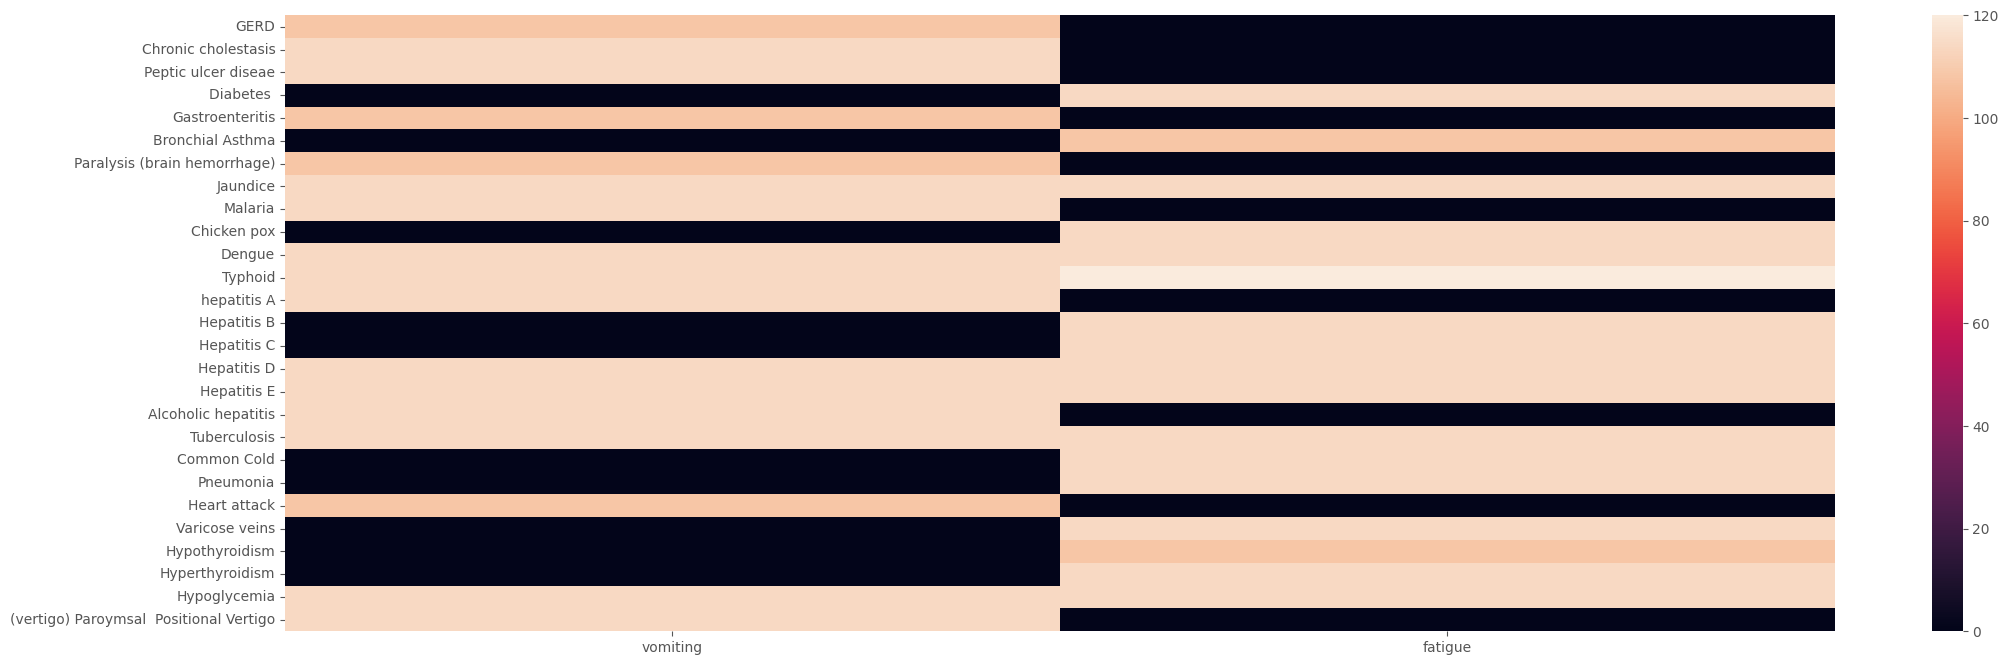

In [9]:
symptoms = ["vomiting", "fatigue"]
filtered_df = patients_df[symptoms + ["prognosis"]].loc[(np.logical_or(*[patients_df[symptom] == 1 for symptom in symptoms]))]

diseases = filtered_df["prognosis"].unique()
symptoms = filtered_df.drop(["prognosis"], axis=1).columns.values
filtered_counts = np.zeros((len(diseases), len(symptoms)))
disease_priors = np.zeros(len(diseases))
for disease_id, disease in enumerate(diseases):
    sub_df = filtered_df.loc[filtered_df["prognosis"] == disease]
    disease_priors[disease_id] = disease_counts[disease]
    for symptom_id, symptom in enumerate(symptoms):
        filtered_counts[disease_id][symptom_id] = np.sum(sub_df[symptom] == 1)
plt.figure(figsize=(25, 8))
sns.heatmap(filtered_counts, xticklabels=symptoms, yticklabels=diseases)
plt.show()
disease_priors = disease_priors / np.sum(disease_priors)

In [10]:
evidence = np.sum(filtered_counts / np.sum(filtered_counts, axis=0), axis=1) / 2

fig = pg.Figure(data=[
    pg.Bar(name='Evidence', x=diseases, y=evidence),
])
# Change the bar mode
fig.show()

In [11]:
evidence = np.sum(filtered_counts / np.sum(filtered_counts, axis=0), axis=1) / 2
posterior = (evidence * disease_priors) / np.sum(evidence * disease_priors)

fig = pg.Figure(data=[
    pg.Bar(name='Evidence', x=diseases, y=evidence),
    pg.Bar(name='Prior', x=diseases, y=disease_priors),
    pg.Bar(name='Posterior', x=diseases, y=posterior)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()